# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [77]:
# Create empty weather_json list to store returns

weather_json = []

# Loop through cities and build weather data dictionary from api response

for (n, city) in enumerate(cities, start=0):

    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'

    try:
        response = requests.get(query_url).json()
        clouds = response['clouds']['all']
        country = response['sys']['country']    
        date = response['dt']
        humidity = response['main']['humidity']
        longitude = response['coord']['lon']
        latitude = response['coord']['lat']
        temp = response['main']['temp']
        wind_speed = response['wind']['speed']
        weather_data = {"City": city,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Cloudiness": clouds,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date,
                        "Longitude": longitude,
                        "Latitude": latitude}
        weather_json.append(weather_data)         
        # Print success message
        print(f'{n}: {city} loaded.')
    except:
        # Print failure message if city fails to load
        print(f'{n}: {city} failed to load.')

0: mponela loaded.
1: srivardhan loaded.
2: kytmanovo loaded.
3: hofn loaded.
4: butaritari loaded.
5: khatanga loaded.
6: bafq loaded.
7: cabo san lucas loaded.
8: toftir failed to load.
9: ponta do sol loaded.
10: puerto ayora loaded.
11: katsuura loaded.
12: grand river south east failed to load.
13: kapaa loaded.
14: nyurba loaded.
15: nizhneyansk failed to load.
16: dhule loaded.
17: jamestown loaded.
18: souillac loaded.
19: hilo loaded.
20: praia da vitoria loaded.
21: bengkulu loaded.
22: punta arenas loaded.
23: taolanaro failed to load.
24: leningradskiy loaded.
25: busselton loaded.
26: atuona loaded.
27: bethel loaded.
28: narsaq loaded.
29: georgetown loaded.
30: vao loaded.
31: ribeira grande loaded.
32: albany loaded.
33: hermanus loaded.
34: castro loaded.
35: nanortalik loaded.
36: barentsburg failed to load.
37: lebu loaded.
38: maloshuyka failed to load.
39: cocal loaded.
40: belushya guba failed to load.
41: new norfolk loaded.
42: cidreira loaded.
43: amderma faile

359: nishihara loaded.
360: cumaribo failed to load.
361: ust-omchug loaded.
362: varna loaded.
363: palabuhanratu failed to load.
364: fukue loaded.
365: shakawe loaded.
366: marcona failed to load.
367: tongliao loaded.
368: shimoda loaded.
369: sorvag failed to load.
370: sabha loaded.
371: zhuzhou loaded.
372: san quintin loaded.
373: ban nahin loaded.
374: aleksandrovsk-sakhalinskiy loaded.
375: port augusta loaded.
376: tougue loaded.
377: nacala loaded.
378: nakkila loaded.
379: deputatskiy loaded.
380: menongue loaded.
381: savonlinna loaded.
382: morondava loaded.
383: santa isabel do rio negro loaded.
384: klaksvik loaded.
385: ojinaga loaded.
386: tecoanapa loaded.
387: nome loaded.
388: lagoa loaded.
389: nguiu failed to load.
390: kaitangata loaded.
391: covington loaded.
392: trat loaded.
393: buala loaded.
394: baykit loaded.
395: broken hill loaded.
396: lata loaded.
397: belyy yar loaded.
398: magan loaded.
399: chumikan loaded.
400: zhezkazgan loaded.
401: parsabad lo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
weather_df = pd.DataFrame(weather_json)
weather_df.to_csv("output_data/weather_df.csv", index=False, header=True)
weather_df

,City,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Longitude,Latitude
0,mponela,16.65,95,21,1.72,MW,1643669418,33.7401,-13.5319
1,srivardhan,20.04,56,10,2.63,IN,1643669419,73.0167,18.0333
2,kytmanovo,-12.90,97,100,1.26,RU,1643669419,85.4479,53.4593
3,hofn,-0.48,88,96,3.80,IS,1643669420,-15.2082,64.2539
4,butaritari,27.39,79,93,5.82,KI,1643669421,172.7902,3.0707
...,...,...,...,...,...,...,...,...,...
582,tagusao,25.56,85,11,2.14,PH,1643669874,117.8141,9.1924
583,grimshaw,-17.22,55,40,5.66,CA,1643669874,-117.6027,56.1834
584,verkhnevilyuysk,-34.62,100,96,1.45,RU,1643669875,120.3167,63.4453
585,concepcion del oro,16.26,14,0,8.17,MX,1643669876,-101.4167,24.6333


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
#  Get the indices of cities that have humidity over 100%.
weather_df_clean = weather_df[weather_df['Humidity'] <= 100]
weather_df_clean

,City,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Longitude,Latitude
0,mponela,16.65,95,21,1.72,MW,1643669418,33.7401,-13.5319
1,srivardhan,20.04,56,10,2.63,IN,1643669419,73.0167,18.0333
2,kytmanovo,-12.90,97,100,1.26,RU,1643669419,85.4479,53.4593
3,hofn,-0.48,88,96,3.80,IS,1643669420,-15.2082,64.2539
4,butaritari,27.39,79,93,5.82,KI,1643669421,172.7902,3.0707
...,...,...,...,...,...,...,...,...,...
582,tagusao,25.56,85,11,2.14,PH,1643669874,117.8141,9.1924
583,grimshaw,-17.22,55,40,5.66,CA,1643669874,-117.6027,56.1834
584,verkhnevilyuysk,-34.62,100,96,1.45,RU,1643669875,120.3167,63.4453
585,concepcion del oro,16.26,14,0,8.17,MX,1643669876,-101.4167,24.6333


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# I handled this issue differently

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

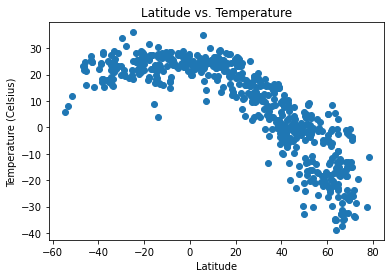

In [80]:
lat_v_temp = plt.scatter(weather_df_clean['Latitude'], weather_df_clean['Temperature'])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.savefig("output_data/lat_v_temp.png")

## Latitude vs. Humidity Plot

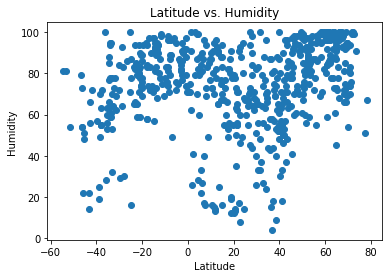

In [81]:
lat_v_humid = plt.scatter(weather_df_clean['Latitude'], weather_df_clean['Humidity'])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/lat_v_humid.png")

## Latitude vs. Cloudiness Plot

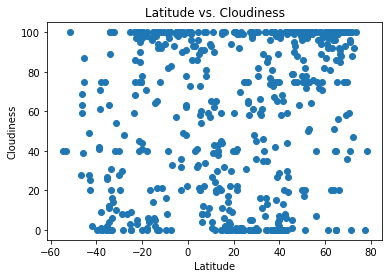

In [82]:
lat_v_cloud = plt.scatter(weather_df_clean['Latitude'], weather_df_clean['Cloudiness'])
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/lat_v_cloud.png")

## Latitude vs. Wind Speed Plot

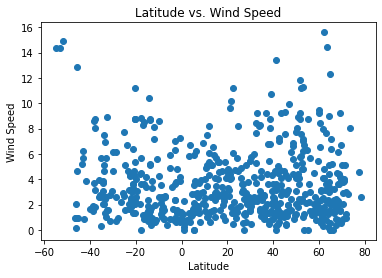

In [83]:
lat_v_wind = plt.scatter(weather_df_clean['Latitude'], weather_df_clean['Wind Speed'])
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/lat_v_wind.png")

## Linear Regression

In [84]:
northern_weather_df = weather_df_clean.loc[weather_df_clean["Latitude"] >= 0]
southern_weather_df = weather_df_clean.loc[weather_df_clean["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

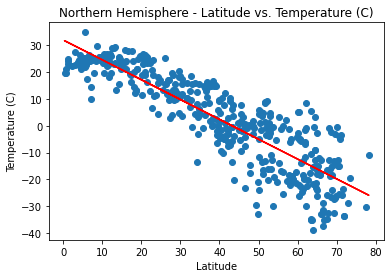

<Figure size 432x288 with 0 Axes>

In [85]:
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Latitude vs. Temperature (C)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()
plt.savefig("output_data/nortnern-hemisphere-lat_v_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

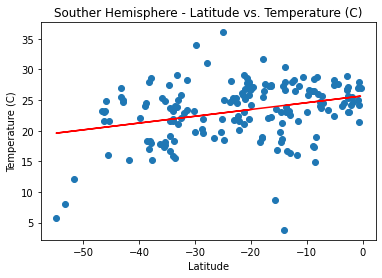

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Souther Hemisphere - Latitude vs. Temperature (C)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()
plt.savefig("output_data/southern-hemisphere-lat_v_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

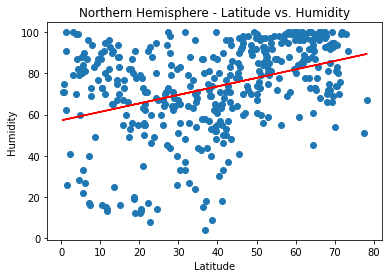

<Figure size 432x288 with 0 Axes>

In [87]:
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data/nortnern-hemisphere-lat_v_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

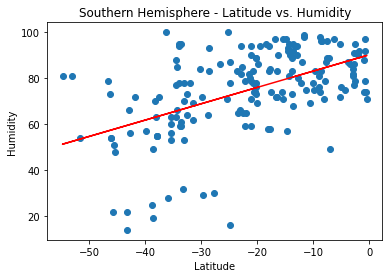

<Figure size 432x288 with 0 Axes>

In [88]:
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data/southern-hemisphere-lat_v_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

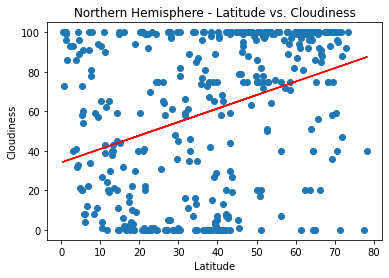

<Figure size 432x288 with 0 Axes>

In [89]:
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data/nortnern-hemisphere-lat_v_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

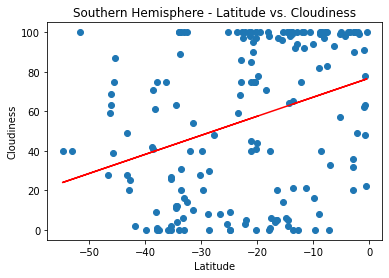

<Figure size 432x288 with 0 Axes>

In [90]:
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data/southern-hemisphere-lat_v_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

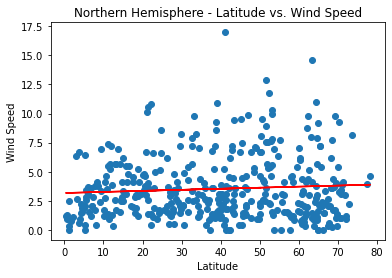

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = northern_weather_df['Latitude']
y_values = northern_weather_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data/nortnern-hemisphere-lat_v_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

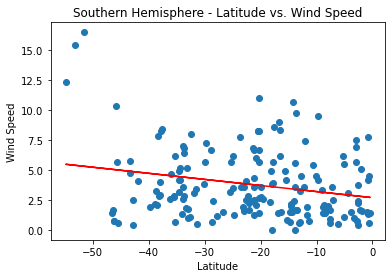

<Figure size 432x288 with 0 Axes>

In [76]:
x_values = southern_weather_df['Latitude']
y_values = southern_weather_df['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data/southern-hemisphere-lat_v_wind.png")

# Observations

* Temperatures are warmer closer to the equator
* humidity does not appear to have any correlation with latitude.
* Wind speed does not appear to have any correlation with latitude.